# Titanic Dataset Exploration

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('titanic-passengersss.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [162]:
df.head().isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [164]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
df.isnull().sum().sum() 

866

### Here I decided to drop the column 'Cabin' because it had too many nulls

In [167]:
df.drop( ["Cabin"],axis=1 , inplace = True)

### Filling the column 'Age' with the mean of all its values

In [168]:
df["Age"].fillna(df["Age"].mean(), inplace= True)
print(df["Age"])

0      28.000000
1      25.000000
2      20.000000
3      29.000000
4      31.000000
         ...    
886    14.000000
887    22.000000
888    30.000000
889    29.699118
890    19.000000
Name: Age, Length: 891, dtype: float64


In [169]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

### Dropping all the nulls in the rows of column 'Embarked'

In [170]:
df.dropna(axis = 0,subset=['Embarked'],how='any', inplace= True)

In [171]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Survived is 1 and didn't survive is 0

In [172]:
encoder= LabelEncoder()
df['Survived'] = encoder.fit_transform(df["Survived"]) 

### Females = 0 and Males = 1

In [173]:
df['Sex'] = encoder.fit_transform(df["Sex"])

### Specifying that C=0, S=1, otherwise=2

In [174]:
df['Embarked']= np.where(df['Embarked']=='C',0,np.where(df['Embarked']=='S',1,2))

### Dropping the rows based on logical feature selection

In [175]:
df.drop( ["Ticket"],axis=1 , inplace = True)

In [176]:
df.drop( ["PassengerId"],axis=1 , inplace = True)

### Converting these columns to integer form to have more accurate results and sorted visualizations

In [177]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  889 non-null    int32 
 1   Pclass    889 non-null    int64 
 2   Name      889 non-null    object
 3   Sex       889 non-null    int32 
 4   Age       889 non-null    int32 
 5   SibSp     889 non-null    int64 
 6   Parch     889 non-null    int64 
 7   Fare      889 non-null    int32 
 8   Embarked  889 non-null    int32 
dtypes: int32(5), int64(3), object(1)
memory usage: 52.1+ KB


### Understanding the count of women and men who survived and who didn't

Percentage of women who survived: 0.7403846153846154
Percentage of men who survived: 0.18890814558058924


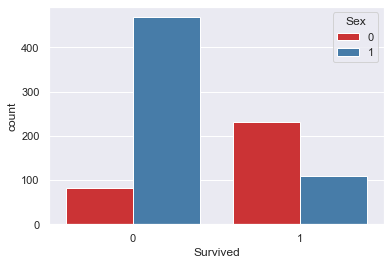

In [201]:
sns.countplot(x = 'Survived',hue = 'Sex', palette= "Set1", data = df)
women = df.loc[df.Sex == 0]["Survived"]
print("Percentage of women who survived:", sum(women)/len(women))
men = df.loc[df.Sex == 1]["Survived"]
print("Percentage of men who survived:", sum(men)/len(men))

### Visualizing the density of all ages on the ship

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


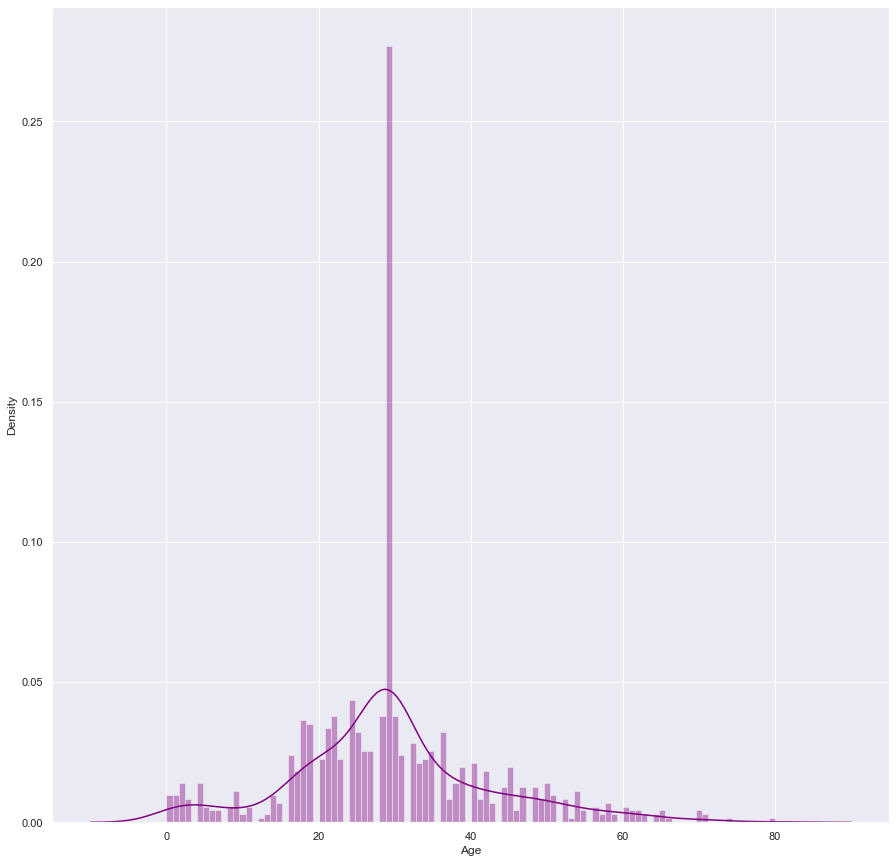

In [202]:
sns.distplot(df['Age'], bins = 100, color='Purple')
fig = plt.gcf()
fig.set_size_inches(15, 15)

### Showing the statistical count/correlation of all men and women with differing ages who survived and didn't

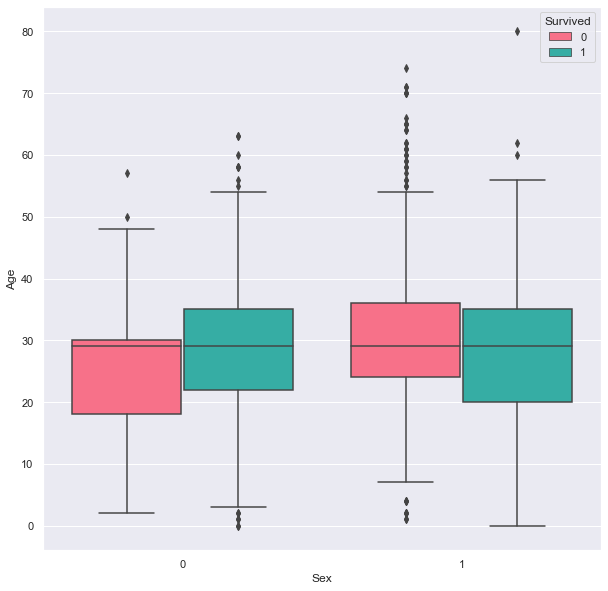

In [203]:
sns.boxplot(x='Sex', y= 'Age',hue= 'Survived', palette="husl", data= df, saturation=1)
fig = plt.gcf()
fig.set_size_inches(10, 10)


### Showing correlation between columns 'Survived' and 'Fare' based on the 'Pclass'

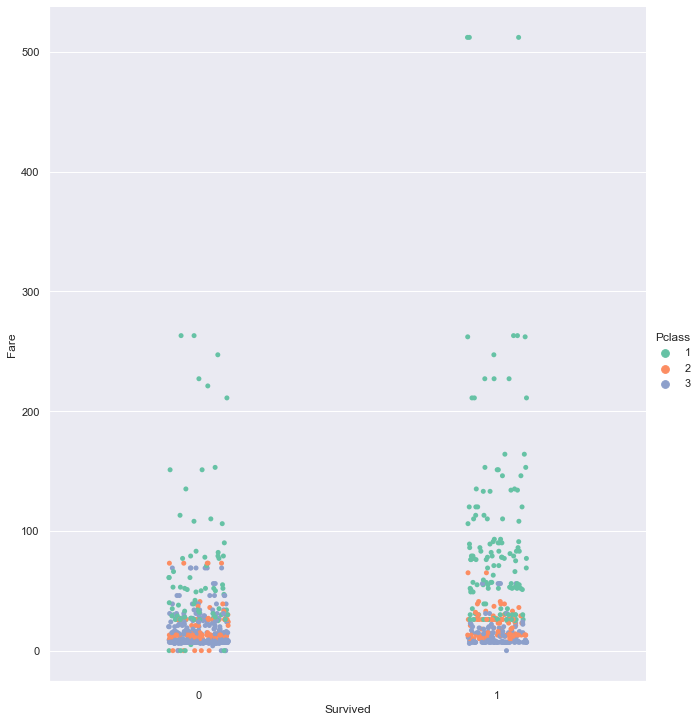

In [204]:
sns.catplot(x="Survived", y="Fare", hue= 'Pclass', data=df, kind="strip", palette= 'Set2',height=10, aspect=.9);

### The figure below is a heatmap that shows correlation between all columns together as well as the target to define the most important features in the dataset and ones that affected the survival.
0 = no correlation, 1 = perfect correlation , from 0.1 to 0.3 is weak, 0.4 to 0.6 is moderate, 0.7 to 0.9 is strong, it can be +ve or -ve, meaning inverse or direct relationship.
By studying this heatmap, we can conclude that the features that might have affected the survival rate the most are Fare, Pclass, and Sex -noting that Pclass and Sex have a negative correlation- and features that might have affected the survival rate the least are Parch, SibSp, and Age* -noting that SibSp and Age have a negative correlation- 


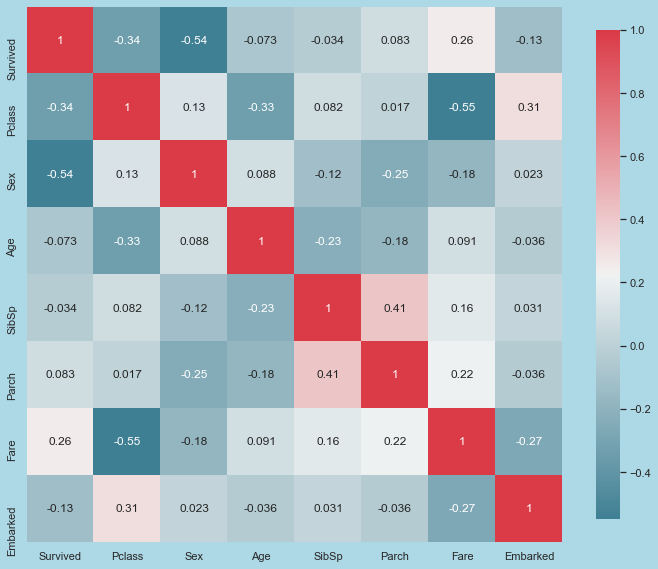

In [183]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [184]:
df[["Pclass", "Survived"]].groupby(["Survived"], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.955882


In [185]:
v= df['Name']
Sp1= df['Title'] = v.str.split(', ', expand = True)[1]

In [186]:
print(df['Title'])

0                                        Mr. Erik Gustaf
1                                      Mr. Sigurd Hansen
2                                         Mr. Hans Peder
3                     Mrs. Nils (Alma Cornelia Berglund)
4                                           Mr. Thornton
                             ...                        
886                          Mrs. Nicholas (Adele Achem)
887                                            Mr. Orsen
888                                         Miss. Marija
889                              Mr. Pastcho ("Pentcho")
890    Miss. Kate Florence ("Mrs Kate Louise Phillips...
Name: Title, Length: 889, dtype: object


In [187]:
Sp2= df['Title'] = Sp1.str.split('.', expand = True)[0]

In [188]:
print(Sp2)

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: 0, Length: 889, dtype: object


### Now that I constructed the column 'Title', there is no need for column 'Name'

In [189]:
df.drop( ["Name"],axis=1 , inplace = True)

In [190]:
print(df)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked Title
0           0       2    1   28      0      0    13         1    Mr
1           0       3    1   25      0      0     7         1    Mr
2           0       3    1   20      0      0     7         1    Mr
3           0       3    0   29      0      4    21         1   Mrs
4           0       1    1   31      1      0    52         1    Mr
..        ...     ...  ...  ...    ...    ...   ...       ...   ...
886         1       2    0   14      1      0    30         0   Mrs
887         0       3    1   22      0      0     7         0    Mr
888         0       3    0   30      0      0     8         1  Miss
889         0       3    1   29      0      0     7         1    Mr
890         1       2    0   19      0      0    26         1  Miss

[889 rows x 9 columns]


### Showing results before adding dictionary

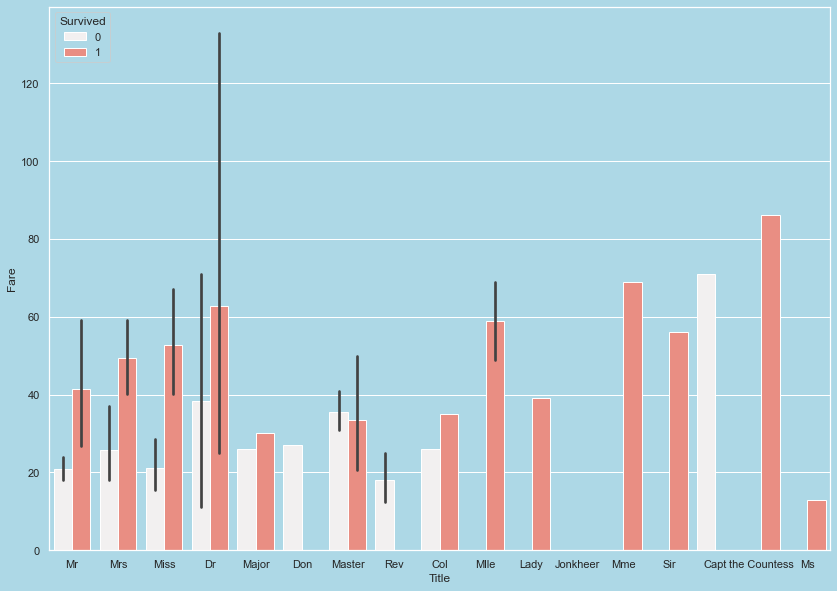

In [191]:
sns.barplot(x= "Title", y="Fare", data= df, hue= "Survived", color= 'Salmon')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
fig = plt.gcf()
fig.set_size_inches(14, 10)

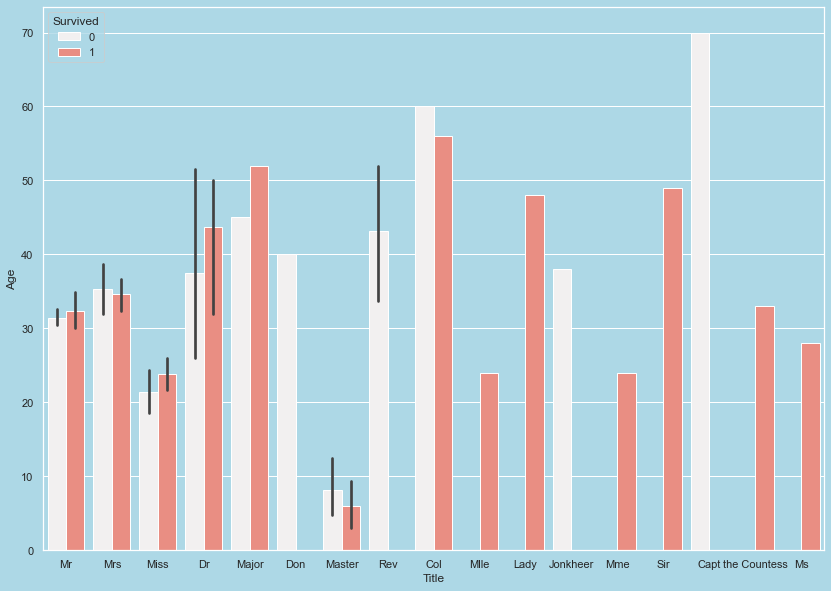

In [192]:
sns.barplot(x= "Title", y="Age", data= df, hue= "Survived", color= 'Salmon')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
fig = plt.gcf()
fig.set_size_inches(14, 10)

In [193]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [194]:
df['Title'].replace(Title_Dictionary, inplace = True)

In [195]:
print(df['Title'])

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: Title, Length: 889, dtype: object


### Showing results after adding dictionary

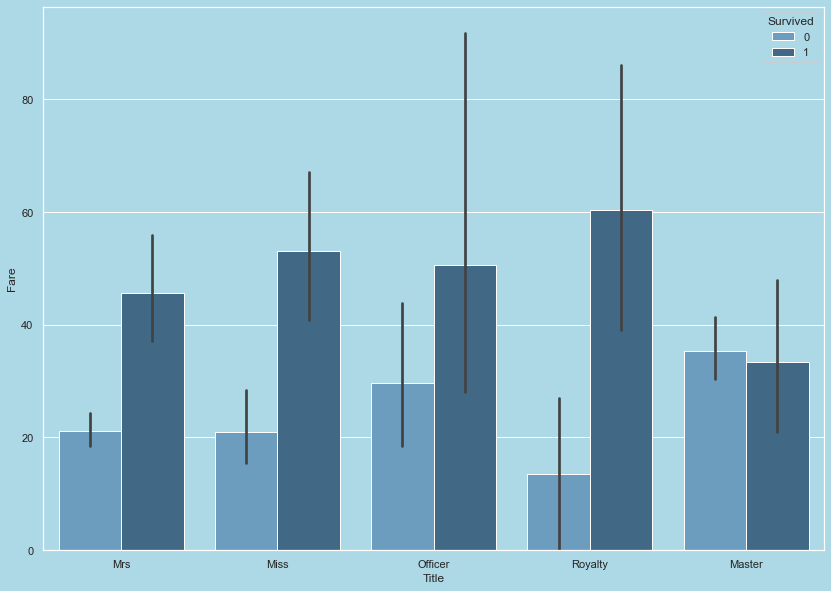

In [196]:
sns.barplot(x= "Title", y="Fare", data= df, hue= "Survived", palette="Blues_d")
fig = plt.gcf()
fig.set_size_inches(14, 10)

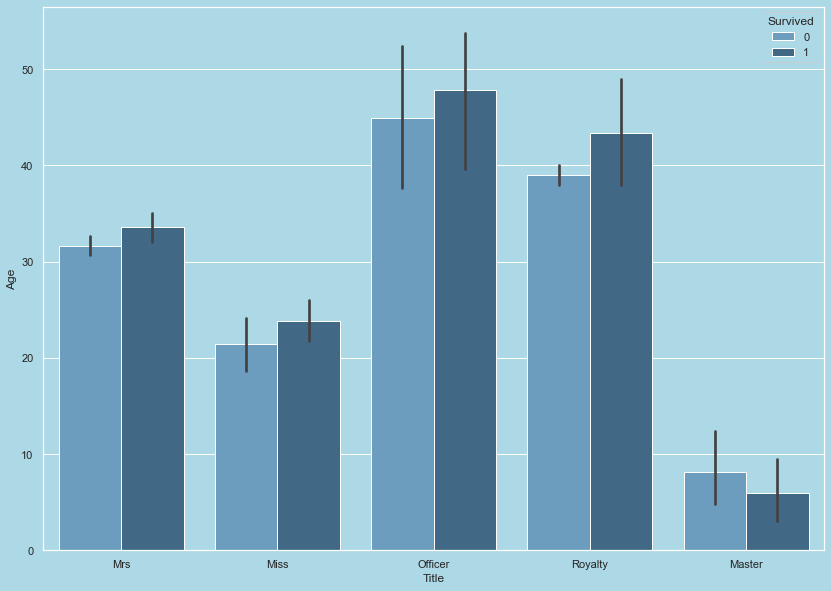

In [197]:
sns.barplot(x= "Title", y="Age", data= df, hue= "Survived",palette="Blues_d")
fig = plt.gcf()
fig.set_size_inches(14, 10)

In [198]:
df['FamilySize'] = df['Parch'] + df['SibSp']

### The column 'FamilySize' shows the the number of relatives that were on the titanic ship in total, which made sense of the column 'Parch' and 'Sibsp' combined much more.

In [199]:
print(df['FamilySize'])

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 889, dtype: int64


### Passengers had a high probabilty of survival with 1 to 3 relatives, but a lower chance if less than 1 or more than 3, and gets even lower if more than 6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


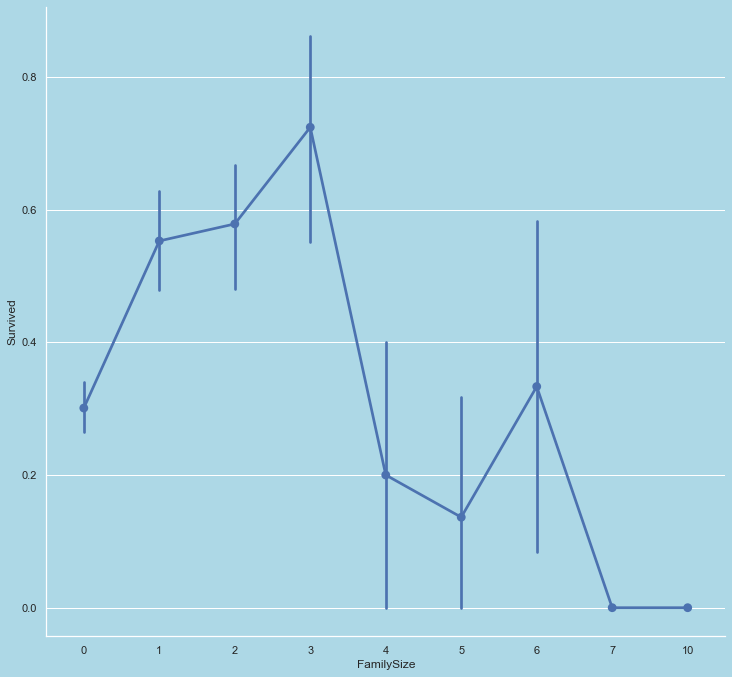

In [200]:
sns.factorplot('FamilySize','Survived', data=df, aspect = 2.5,)
sns.set_style('darkgrid')
sns.set_palette('pastel')
fig = plt.gcf()
fig.set_size_inches(10, 10)